<a href="https://colab.research.google.com/github/Murielbs/ENEM_2020/blob/main/ENEM2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv("MICRODADOS_ENEM_2020.csv", sep=";", encoding="latin1")
df.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,200006271946,2020,11,F,1,2,1,1,11,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,200001195856,2020,11,M,2,3,1,1,11,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,200001943954,2020,4,F,2,3,2,2,0,2,...,B,A,A,B,A,A,A,A,A,A
3,200001908998,2020,2,M,1,3,1,2,0,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,200001634757,2020,4,F,1,3,2,1,1,1,...,A,A,A,B,A,B,B,A,A,B


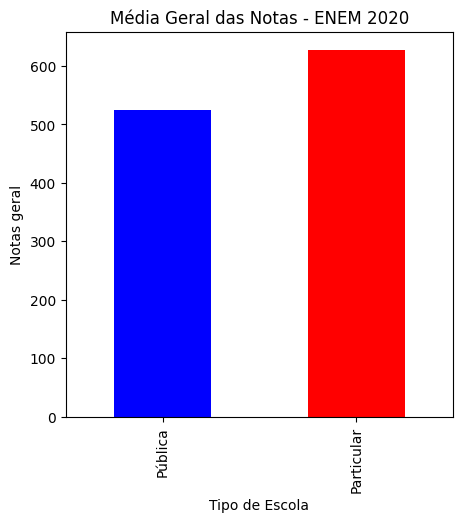

In [18]:
#Histograma
df["NOTA_GERAL"] = df[["NU_NOTA_MT", "NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_REDACAO"]].mean(axis=1)
medias = df[df["TP_ESCOLA"].isin([2, 3])].groupby("TP_ESCOLA")["NOTA_GERAL"].mean()
medias.index = medias.index.map({2: "Pública", 3: "Particular"})
medias.plot(kind="bar", color=["blue", "red"], figsize=(5,5))
plt.title("Média Geral das Notas - ENEM 2020")
plt.ylabel("Notas geral")
plt.xlabel("Tipo de Escola")
plt.show()


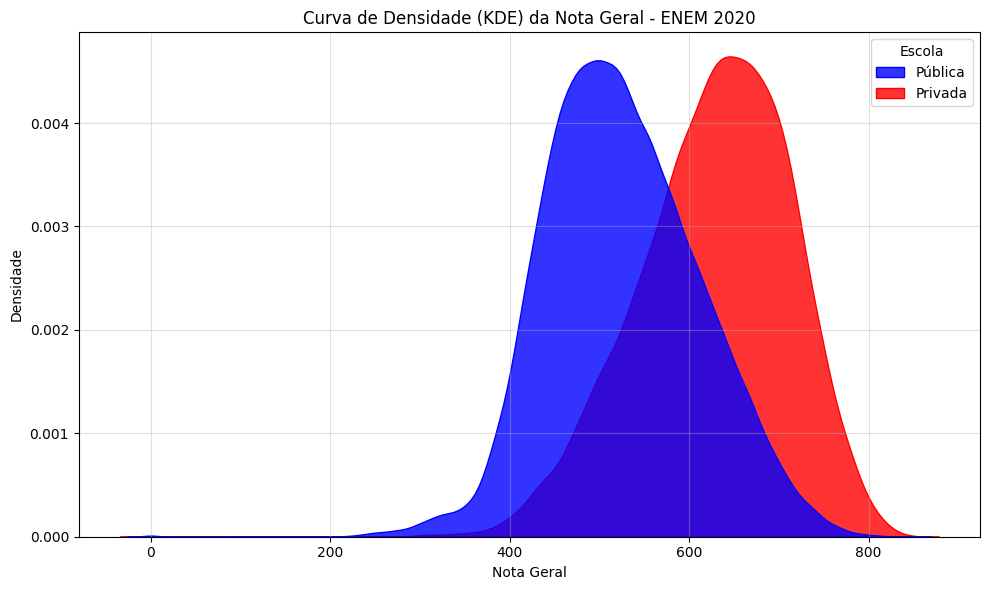

In [14]:
#Curva de densidade (KDE)
df_plot = df[df["TP_ESCOLA"].isin([2,3])].copy()
df_plot["Escola"] = df_plot["TP_ESCOLA"].replace({2: "Pública", 3: "Privada"})
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_plot, x="NOTA_GERAL",hue="Escola",fill=True,common_norm=False,alpha=0.8,
    palette=["blue", "red"]
)
plt.title("Curva de Densidade (KDE) da Nota Geral - ENEM 2020")
plt.xlabel("Nota Geral")
plt.ylabel("Densidade")
plt.grid(True, alpha=0.4)
plt.tight_layout()
plt.show()


/tmp/ipython-input-85390170.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[df["TP_ESCOLA"].isin([2,3])], x="TP_ESCOLA", y="NOTA_GERAL", palette = ["blue","red"])


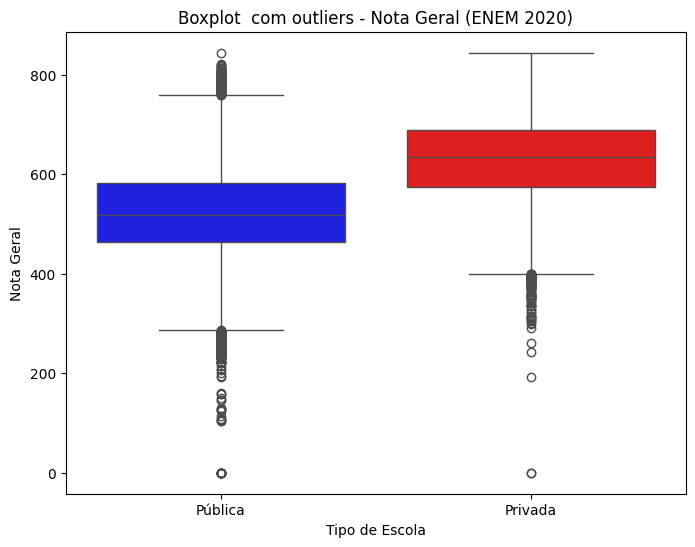

In [17]:
#Boxplot  com outliers
plt.figure(figsize=(8,6))
sns.boxplot(data=df[df["TP_ESCOLA"].isin([2,3])], x="TP_ESCOLA", y="NOTA_GERAL", palette = ["blue","red"])
plt.title("Boxplot  com outliers - Nota Geral (ENEM 2020)")
plt.xlabel("Tipo de Escola")
plt.ylabel("Nota Geral")
plt.xticks(ticks=[0,1], labels=["Pública", "Privada"])
plt.show()

/tmp/ipython-input-1643872097.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


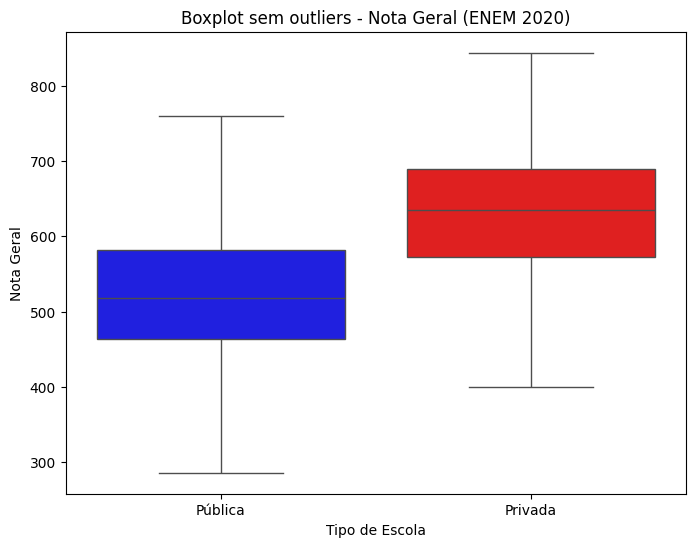

In [16]:
#Boxplot sem outliers
plt.figure(figsize=(8,6))
sns.boxplot(
    data=df[df["TP_ESCOLA"].isin([2,3])],x="TP_ESCOLA",y="NOTA_GERAL", palette=["blue", "red"],
  showfliers=False
)
plt.title("Boxplot sem outliers - Nota Geral (ENEM 2020)")
plt.xlabel("Tipo de Escola")
plt.ylabel("Nota Geral")
plt.xticks(ticks=[0,1], labels=["Pública", "Privada"])
plt.show()